In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:

%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 13
plt.ion()

In [4]:
def f(z) :
    return np.power(z, 2) - 1


In [5]:
f(0)

-1

In [8]:
z = [4, 1-0.2j, 1.6]
f(z)

array([15.  +0.j , -0.04-0.4j,  1.56+0.j ])

In [9]:
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
x, y

(array([[-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
           9.59183673,  10.        ],
        [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
           9.59183673,  10.        ],
        [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
           9.59183673,  10.        ],
        ...,
        [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
           9.59183673,  10.        ],
        [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
           9.59183673,  10.        ],
        [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
           9.59183673,  10.        ]]),
 array([[-10.        , -10.        , -10.        , ..., -10.        ,
         -10.        , -10.        ],
        [ -9.59183673,  -9.59183673,  -9.59183673, ...,  -9.59183673,
          -9.59183673,  -9.59183673],
        [ -9.18367347,  -9.18367347,  -9.18367347, ...,  -9.18367347,
          -9.18367347,  -9.18367347],
        ...,


In [10]:
mesh = y * 1j + x
mesh

array([[-10.        -10.j        ,  -9.59183673-10.j        ,
         -9.18367347-10.j        , ...,   9.18367347-10.j        ,
          9.59183673-10.j        ,  10.        -10.j        ],
       [-10.         -9.59183673j,  -9.59183673 -9.59183673j,
         -9.18367347 -9.59183673j, ...,   9.18367347 -9.59183673j,
          9.59183673 -9.59183673j,  10.         -9.59183673j],
       [-10.         -9.18367347j,  -9.59183673 -9.18367347j,
         -9.18367347 -9.18367347j, ...,   9.18367347 -9.18367347j,
          9.59183673 -9.18367347j,  10.         -9.18367347j],
       ...,
       [-10.         +9.18367347j,  -9.59183673 +9.18367347j,
         -9.18367347 +9.18367347j, ...,   9.18367347 +9.18367347j,
          9.59183673 +9.18367347j,  10.         +9.18367347j],
       [-10.         +9.59183673j,  -9.59183673 +9.59183673j,
         -9.18367347 +9.59183673j, ...,   9.18367347 +9.59183673j,
          9.59183673 +9.59183673j,  10.         +9.59183673j],
       [-10.        +10.j   

In [11]:
output = np.abs(f(mesh))
output

array([[200.00249998, 192.04757956, 184.42750249, ..., 184.42750249,
        192.04757956, 200.00249998],
       [191.96428351, 184.00938116, 176.38947737, ..., 176.38947737,
        184.00938116, 191.96428351],
       [184.25759987, 176.30256331, 168.68268096, ..., 168.68268096,
        176.30256331, 184.25759987],
       ...,
       [184.25759987, 176.30256331, 168.68268096, ..., 168.68268096,
        176.30256331, 184.25759987],
       [191.96428351, 184.00938116, 176.38947737, ..., 176.38947737,
        184.00938116, 191.96428351],
       [200.00249998, 192.04757956, 184.42750249, ..., 184.42750249,
        192.04757956, 200.00249998]])

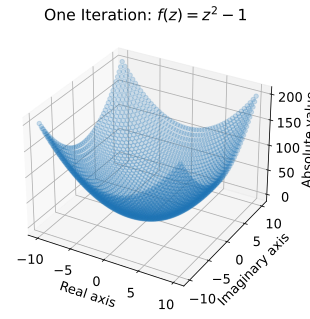

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')      # 실수부
ax.set_ylabel('Imaginary axis') # 허수부
ax.set_zlabel('Absolute value') # 함수값의 절대값
ax.set_title('One Iteration: $f(z) = z^2 - 1$');

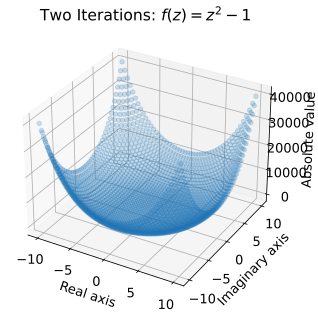

In [13]:
output = np.abs(f(f(mesh)))

ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('Two Iterations: $ f(z) = z^2 - 1$');

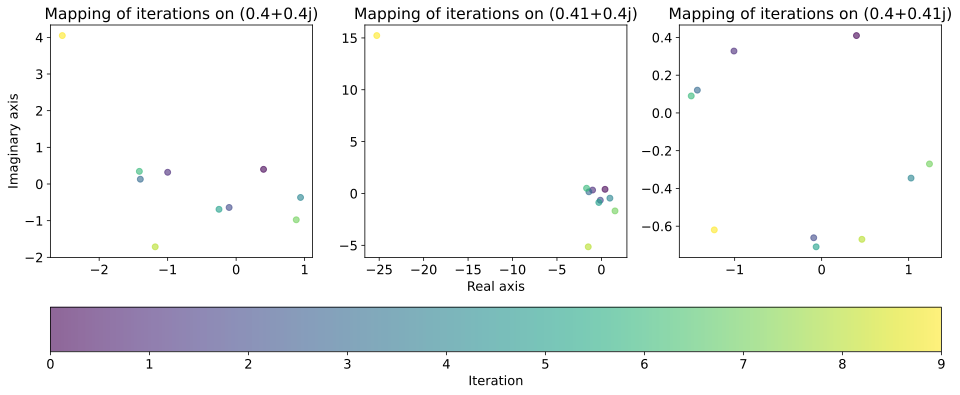

In [14]:
selected_values = np.array([0.4 + 0.4j, 0.41 + 0.4j, 0.4 + 0.41j])
num_iter = 9

outputs = np.zeros(
    (num_iter+1, selected_values.shape[0]),  # 10X3 Zero 배열 생성
    dtype=complex  # 데이터 타입: 복소수
)
outputs[0] = selected_values   # 함수 초기 조건

for i in range(num_iter):
    outputs[i+1] = f(outputs[i])  # 10번 함수 반복하는 동안 각 결과를 저장

fig, axes = plt.subplots(1, selected_values.shape[0], figsize=(16, 6))
axes[1].set_xlabel('Real axis')
axes[0].set_ylabel('Imaginary axis')

for ax, data in zip(axes, outputs.T):
    cycle = ax.scatter(
        data.real,  # 실수부
        data.imag,  # 허수부
        c=range(data.shape[0]),
        alpha=0.6
    )
    ax.set_title(f'Mapping of iterations on {data[0]}')

fig.colorbar(cycle, ax=axes, location='bottom', label='Iteration');


In [15]:
def divergence_rate(mesh, num_iter=10, radius=2):

    z = mesh.copy()

    diverge_len = np.zeros(mesh.shape)

    for i in range(num_iter):
        conv_mask = np.abs(z) < 2

        for j in range(len(conv_mask)) :
            for k in range(len(conv_mask[j])):
                if conv_mask[j][k]:
                    diverge_len[j][k] += 1

                    z[j][k] = f(z[j][k])

    return diverge_len

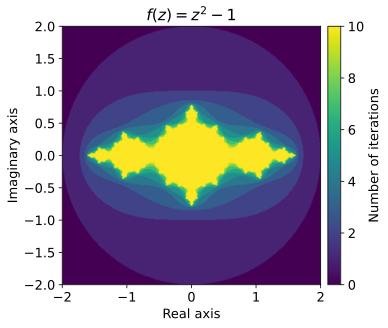

In [16]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2-1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations');